# Load and inspect files

In [10]:
path = "/data/user/tchau/Sandbox/SelfVeto_DeepCore/scripts/nuVeto/output_pf/"

In [11]:
ls /data/user/tchau/Sandbox/SelfVeto_DeepCore/scripts/nuVeto/output_pf/

pf_oscNext_L7_0.000_conv_nu_e.pkl       pf_oscNext_L7_0.513_conv_nu_e.pkl
pf_oscNext_L7_0.000_conv_nu_ebar.pkl    pf_oscNext_L7_0.513_conv_nu_ebar.pkl
pf_oscNext_L7_0.000_conv_nu_mu.pkl      pf_oscNext_L7_0.513_conv_nu_mu.pkl
pf_oscNext_L7_0.000_conv_nu_mubar.pkl   pf_oscNext_L7_0.513_conv_nu_mubar.pkl
pf_oscNext_L7_0.000_conv_nu_tau.pkl     pf_oscNext_L7_0.513_conv_nu_tau.pkl
pf_oscNext_L7_0.000_conv_nu_taubar.pkl  pf_oscNext_L7_0.513_conv_nu_taubar.pkl
pf_oscNext_L7_0.026_conv_nu_e.pkl       pf_oscNext_L7_0.538_conv_nu_e.pkl
pf_oscNext_L7_0.026_conv_nu_ebar.pkl    pf_oscNext_L7_0.538_conv_nu_ebar.pkl
pf_oscNext_L7_0.026_conv_nu_mu.pkl      pf_oscNext_L7_0.538_conv_nu_mu.pkl
pf_oscNext_L7_0.026_conv_nu_mubar.pkl   pf_oscNext_L7_0.538_conv_nu_mubar.pkl
pf_oscNext_L7_0.026_conv_nu_tau.pkl     pf_oscNext_L7_0.538_conv_nu_tau.pkl
pf_oscNext_L7_0.026_conv_nu_taubar.pkl  pf_oscNext_L7_0.538_conv_nu_taubar.pkl
pf_oscNext_L7_0.051_conv_nu_e.pkl       pf_oscNext_L7_0.564_conv_nu_e.pkl
pf_oscNe

In [13]:
import os
import pandas as pd
import pickle
import glob
import numpy as np

# Get all .pkl files
pkl_files = glob.glob(os.path.join(path, "*.pkl"))

# Dictionary to store DataFrames for each neutrino type
neutrino_data = {}

# Loop through each file
for file in pkl_files:
    filename = os.path.basename(file)

    # Extract neutrino type from filename
    parts = filename.split("_")
    neutrino_type = "_".join(parts[4:]).replace(".pkl", "")

    # Ignore tau neutrinos
    if "nu_tau" in neutrino_type:
        continue

    # Load the pickle file
    with open(file, "rb") as f:
        data = pickle.load(f)  # Expecting a dictionary

    # Extract cos_theta, energy, and pf
    cos_theta = data.get("cos_theta", None)
    energy = np.array(data.get("energy", []))  # Convert to NumPy array
    pf = np.array(data.get("pf", []))  # Convert to NumPy array

    # Ensure energy and pf have the same length
    if len(energy) != len(pf):
        print(f"Skipping {filename}, mismatched array sizes")
        continue

    # Create a DataFrame
    df = pd.DataFrame({"cos_theta": cos_theta, "energy": energy, "passing_fraction": pf})

    # Store in dictionary
    if neutrino_type not in neutrino_data:
        neutrino_data[neutrino_type] = df
    else:
        neutrino_data[neutrino_type] = pd.concat([neutrino_data[neutrino_type], df])
'''
# Save results to an Excel file with multiple sheets
output_file = "pkl_neutrino_data.xlsx"
with pd.ExcelWriter(output_file) as writer:
    for nu_type, df in neutrino_data.items():
        df.to_excel(writer, sheet_name=nu_type, index=False)
'''

for nu_type, df in neutrino_data.items():
    csv_filename = f"{nu_type}.csv"
    df.to_csv(csv_filename, index=False)
    print(f"Saved: {csv_filename}")

print(f"Data saved")

# --- File inspection ---
# Pick one of the loaded files to inspect
if neutrino_data:
    sample_file = list(neutrino_data.keys())[0]  # Pick the first neutrino type
    sample_df = neutrino_data[sample_file]

    print(f"\nSample file: {sample_file}")
    print(sample_df.info())  # Print column details
    print(sample_df.head())  # Print first few rows
else:
    print("No valid files were processed.")


Saved: conv_nu_e.csv
Saved: conv_nu_mubar.csv
Saved: conv_nu_ebar.csv
Saved: conv_nu_mu.csv
Data saved to pkl_neutrino_data.xlsx

Sample file: conv_nu_e
<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 49
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cos_theta         2000 non-null   float64
 1   energy            2000 non-null   float64
 2   passing_fraction  2000 non-null   float64
dtypes: float64(3)
memory usage: 62.5 KB
None
   cos_theta    energy  passing_fraction
0   0.923077  1.000000          0.986110
1   0.923077  1.151395          0.986191
2   0.923077  1.325711          0.986248
3   0.923077  1.526418          0.986276
4   0.923077  1.757511          0.986273


# Plotting

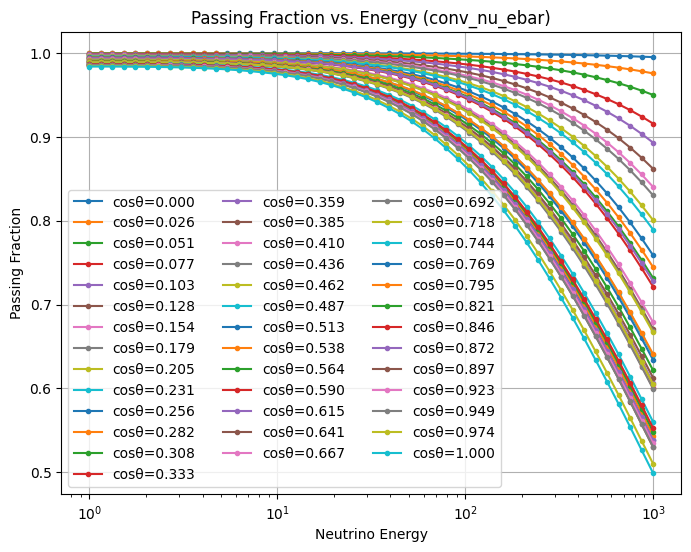

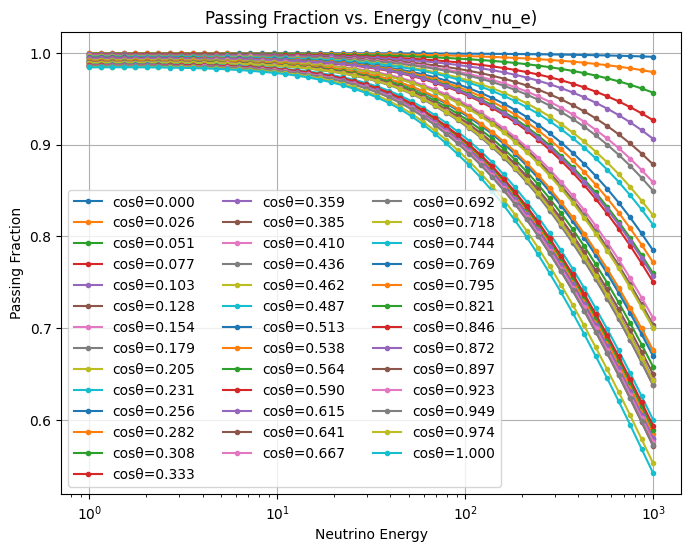

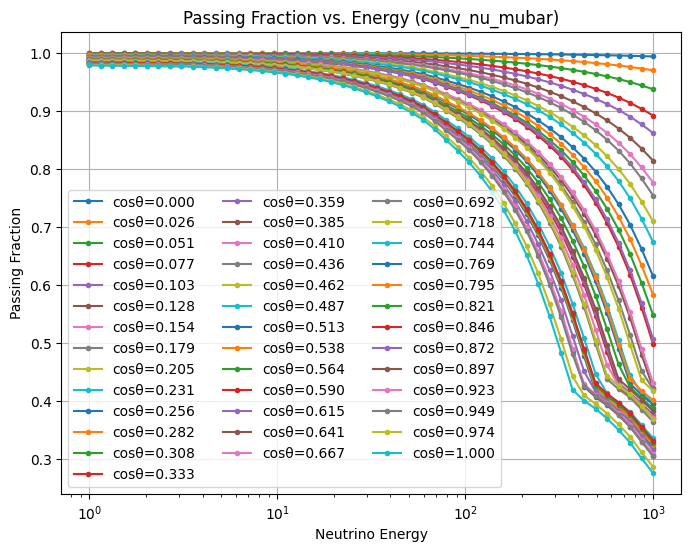

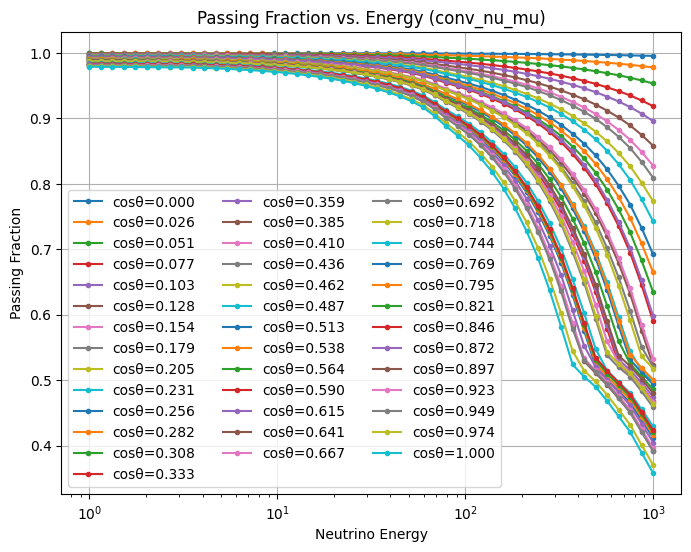

In [18]:
import matplotlib.pyplot as plt


# Get all CSV files
csv_files = glob.glob("conv_*.csv")  # Assumes all neutrino data files are in the current directory

# Loop through each CSV file
for file in csv_files:
    # Load data
    df = pd.read_csv(file)

    # Check if required columns exist
    if not {"cos_theta", "energy", "passing_fraction"}.issubset(df.columns):
        print(f"Skipping {file}, missing columns")
        continue

    # Get unique cos_theta values
    cos_theta_values = sorted(df["cos_theta"].unique())

    # Plot passing fraction vs. energy for each cos_theta
    plt.figure(figsize=(8, 6))
    
    for cos_theta in cos_theta_values:
        subset = df[df["cos_theta"] == cos_theta]
        plt.plot(subset["energy"], subset["passing_fraction"], marker=".", linestyle="-", label=f"cosθ={cos_theta:.3f}")

    # Customize plot
    plt.xscale("log")
    plt.xlabel("Neutrino Energy")
    plt.ylabel("Passing Fraction")
    plt.title(f"Passing Fraction vs. Energy ({file.replace('.csv', '')})")
    plt.legend(loc="lower left", ncol=3)
    plt.grid(True)
    
    # Show plot
    plt.show()


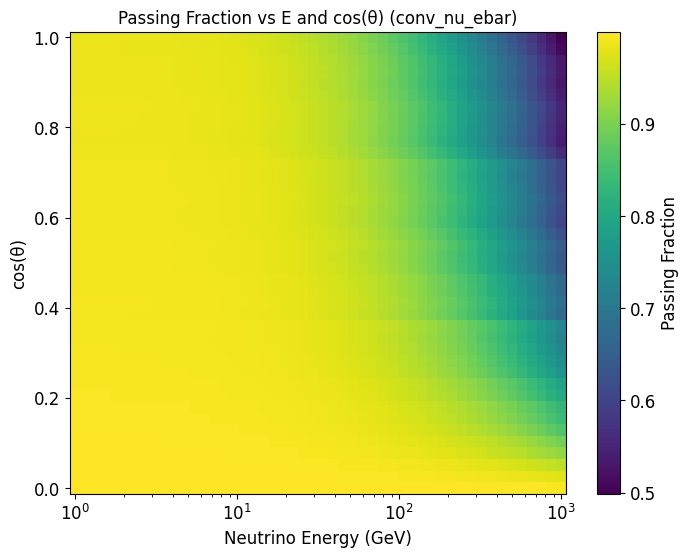

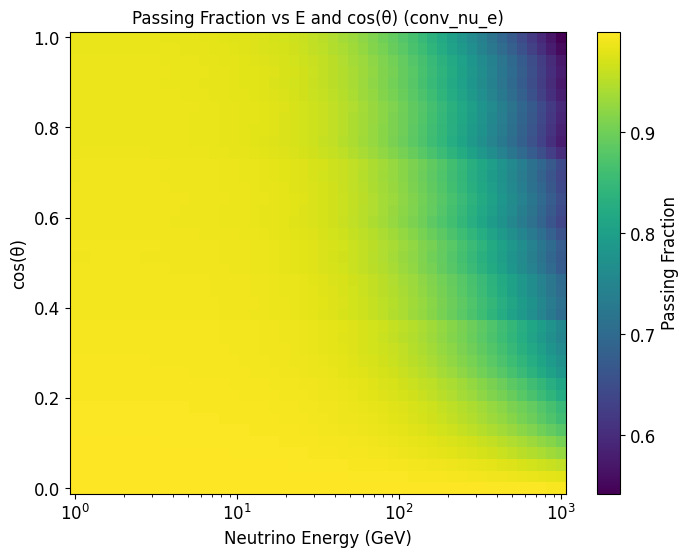

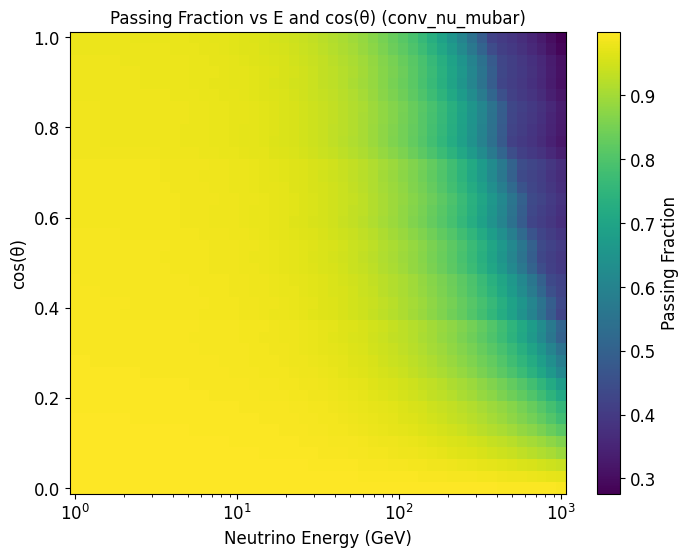

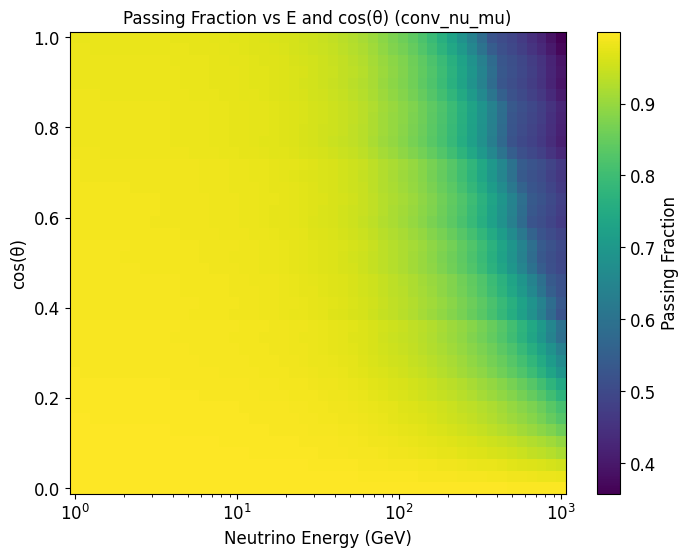

In [20]:
# Get all CSV files
csv_files = glob.glob("conv_*.csv")

# Loop through each CSV file
for file in csv_files:
    # Load data
    df = pd.read_csv(file)

    # Check if required columns exist
    if not {"cos_theta", "energy", "passing_fraction"}.issubset(df.columns):
        print(f"Skipping {file}, missing columns")
        continue

    # Get unique cos_theta and energy values (sorted)
    cos_theta_values = np.sort(df["cos_theta"].unique())  # Sorted cos(θ)
    energy_values = np.sort(df["energy"].unique())  # Sorted energy

    # Create a 2D array to store passing fraction values
    Z = np.full((len(cos_theta_values), len(energy_values)), np.nan)

    # Fill the grid with passing fraction values
    for i, cos_theta in enumerate(cos_theta_values):
        for j, energy in enumerate(energy_values):
            pf_value = df[(df["cos_theta"] == cos_theta) & (df["energy"] == energy)]["passing_fraction"]
            if not pf_value.empty:
                Z[i, j] = pf_value.values[0]  # Assign exact value

    # Create 2D plot
    plt.figure(figsize=(8, 6))

    # Use pcolormesh for better visualization
    mesh = plt.pcolormesh(energy_values, cos_theta_values, Z, shading="auto", cmap="viridis")

    # Log scale for energy axis
    plt.xscale("log")

    # Labels and title
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.xlabel('Neutrino Energy (GeV)', fontsize=12)
    plt.ylabel("cos(θ)", fontsize=12)
    plt.title(f"Passing Fraction vs E and cos(θ) ({file.replace('.csv', '')})")

    # Add colorbar
    cbar = plt.colorbar(mesh)
    cbar.set_label("Passing Fraction", fontsize=12)
    cbar.ax.tick_params(labelsize=12)

    # Show plot
    plt.show()


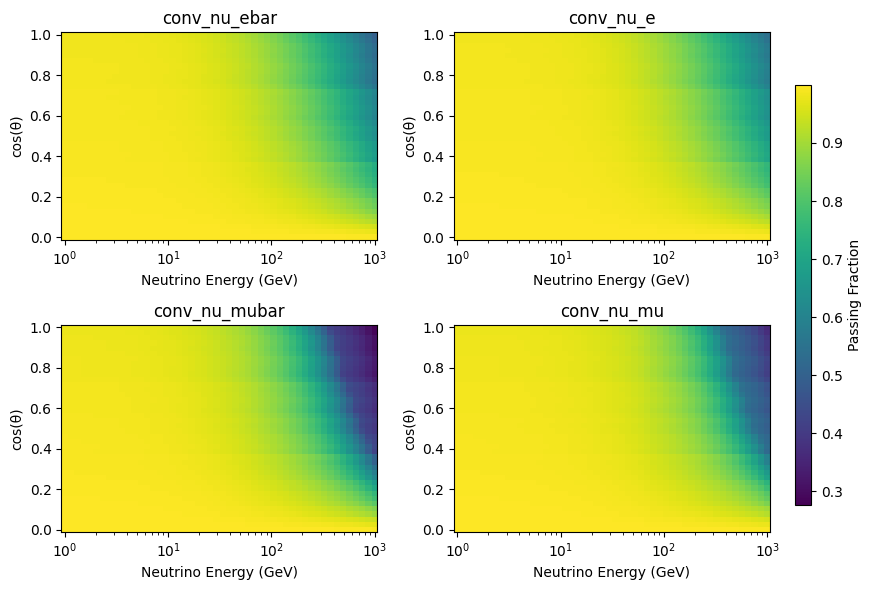

In [14]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get all CSV files
csv_files = glob.glob("conv_*.csv")

# Find global min and max for passing_fraction
global_min = float("inf")
global_max = float("-inf")

for file in csv_files:
    df = pd.read_csv(file)
    
    if "passing_fraction" in df.columns:
        local_min = df["passing_fraction"].min()
        local_max = df["passing_fraction"].max()
        
        global_min = min(global_min, local_min)
        global_max = max(global_max, local_max)

# Plot in a 2x2 grid
num_files = len(csv_files)
num_rows = 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for idx, file in enumerate(csv_files):
    if idx >= num_rows * num_cols:
        break  # Prevent plotting more than 4 files

    df = pd.read_csv(file)

    if not {"cos_theta", "energy", "passing_fraction"}.issubset(df.columns):
        print(f"Skipping {file}, missing columns")
        continue

    # Get unique cos_theta and energy values (sorted)
    cos_theta_values = np.sort(df["cos_theta"].unique())
    energy_values = np.sort(df["energy"].unique())

    # Create a 2D array to store passing fraction values
    Z = np.full((len(cos_theta_values), len(energy_values)), np.nan)

    # Fill the grid with passing fraction values
    for i, cos_theta in enumerate(cos_theta_values):
        for j, energy in enumerate(energy_values):
            pf_value = df[(df["cos_theta"] == cos_theta) & (df["energy"] == energy)]["passing_fraction"]
            if not pf_value.empty:
                Z[i, j] = pf_value.values[0]

    # Use pcolormesh with fixed vmin and vmax
    mesh = axes[idx].pcolormesh(energy_values, cos_theta_values, Z, shading="auto", cmap="viridis",
                                vmin=global_min, vmax=global_max)

    # Log scale for energy axis
    axes[idx].set_xscale("log")

    # Labels and title
    axes[idx].set_xlabel('Neutrino Energy (GeV)', fontsize=10)
    axes[idx].set_ylabel("cos(θ)", fontsize=10)
    axes[idx].set_title(f"{file.replace('.csv', '')}", fontsize=12)

# Adjust layout
fig.tight_layout()

# Add a common colorbar
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])  # Position of colorbar
fig.colorbar(mesh, cax=cbar_ax, label="Passing Fraction")

# Show all plots
plt.show()


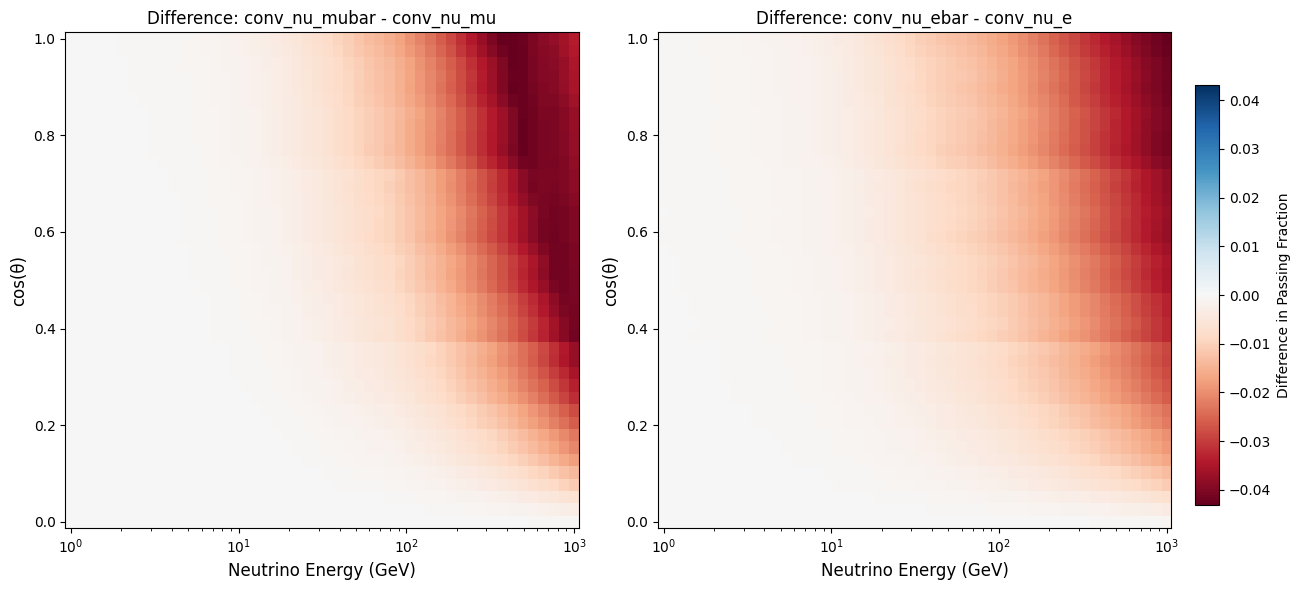

In [13]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define file pairs for comparison
file_pairs = [
    ("conv_nu_mubar.csv", "conv_nu_mu.csv"),
    ("conv_nu_ebar.csv", "conv_nu_e.csv")
]

# Check if all required files exist
existing_files = set(glob.glob("conv_*.csv"))
missing_files = [f for pair in file_pairs for f in pair if f not in existing_files]

if missing_files:
    print("Missing files:", missing_files)
    exit()

# Function to load data and create a passing fraction grid
def load_passing_fraction_grid(file):
    df = pd.read_csv(file)

    if not {"cos_theta", "energy", "passing_fraction"}.issubset(df.columns):
        print(f"Skipping {file}, missing columns")
        return None, None, None

    # Get unique sorted cos_theta and energy values
    cos_theta_values = np.sort(df["cos_theta"].unique())
    energy_values = np.sort(df["energy"].unique())

    # Create 2D array for passing fraction values
    Z = np.full((len(cos_theta_values), len(energy_values)), np.nan)

    for i, cos_theta in enumerate(cos_theta_values):
        for j, energy in enumerate(energy_values):
            pf_value = df[(df["cos_theta"] == cos_theta) & (df["energy"] == energy)]["passing_fraction"]
            if not pf_value.empty:
                Z[i, j] = pf_value.values[0]

    return cos_theta_values, energy_values, Z

# Prepare subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Loop through the file pairs and compute differences
for idx, (file1, file2) in enumerate(file_pairs):
    cos_theta_values, energy_values, Z1 = load_passing_fraction_grid(file1)
    _, _, Z2 = load_passing_fraction_grid(file2)

    if Z1 is None or Z2 is None:
        print(f"Skipping comparison for {file1} and {file2}")
        continue

    # Compute the difference
    Z_diff = Z1 - Z2

    # Create 2D plot
    mesh = axes[idx].pcolormesh(energy_values, cos_theta_values, Z_diff, shading="auto", cmap="RdBu", vmin=-np.nanmax(np.abs(Z_diff)), vmax=np.nanmax(np.abs(Z_diff)))

    # Log scale for energy axis
    axes[idx].set_xscale("log")

    # Labels and title
    axes[idx].set_xlabel("Neutrino Energy (GeV)", fontsize=12)
    axes[idx].set_ylabel("cos(θ)", fontsize=12)
    axes[idx].set_title(f"Difference: {file1.replace('.csv', '')} - {file2.replace('.csv', '')}", fontsize=12)

# Adjust layout
fig.tight_layout()

# Add a common colorbar
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])  # Position of colorbar
fig.colorbar(mesh, cax=cbar_ax, label="Difference in Passing Fraction")

# Show plots
plt.show()
